In [1]:
import os
import glob
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
import rioxarray as rxr
import numpy as np
from skimage import exposure
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import adjust_band
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
print('packages loaded')

packages loaded


In [2]:
# SET DIRECTORIES

dirImgLoc = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_*[B02-B04].jp2'
#print(os.listdir(dirImgLoc))

stack_band_paths = glob(dirImgLoc)
stack_band_paths.sort()
print(stack_band_paths)
# Shapefile directory
dirPolyLoc = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/shapefiles/19384.shp'


#Output directory
out = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/output/'

['/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B02.jp2', '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B03.jp2', '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B04.jp2']


In [62]:
arr_st, meta = es.stack(stack_band_paths, nodata = -9999)

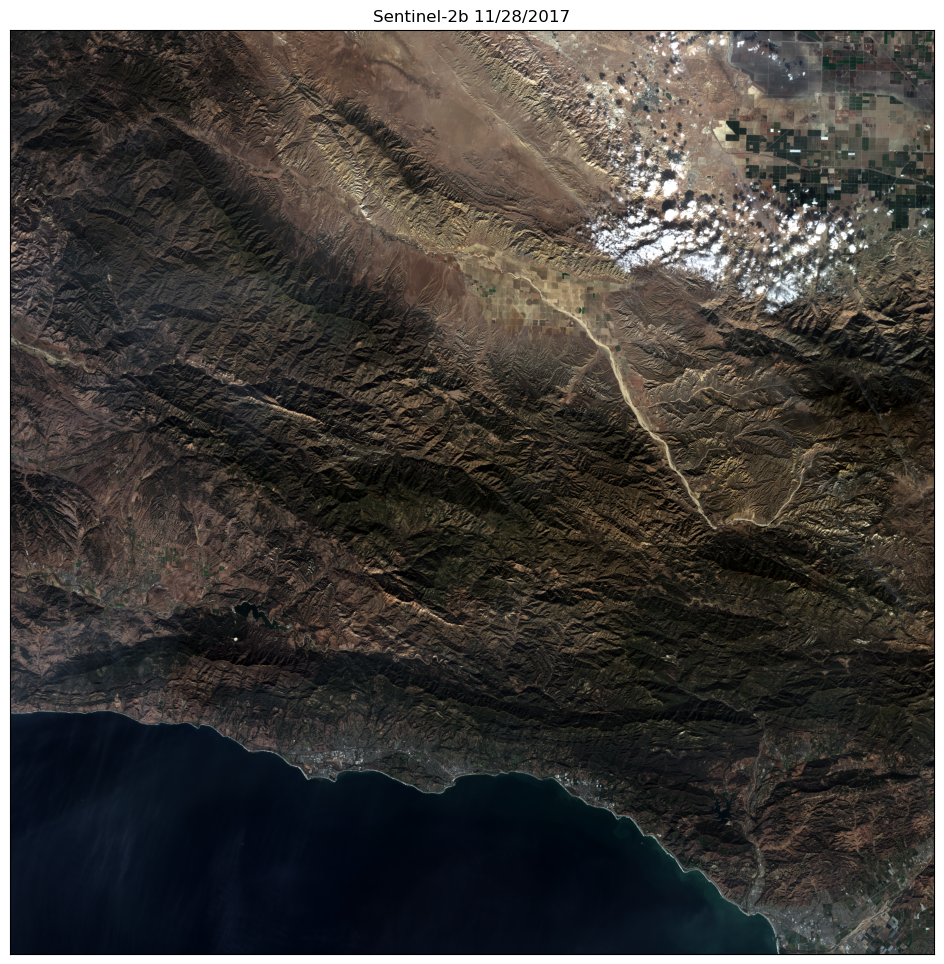

In [63]:
fig, ax = plt.subplots(figsize=(12,12))

ep.plot_rgb(
    arr_st, 
    rgb=(2,1,0), 
    ax=ax,
    stretch=True,
    str_clip=0.5,
    title='Sentinel-2b 11/28/2017')
plt.show()

#fig.savefig(out + 'pre-fire', dpi = 'figure', format='png', metadata=meta, bbox_inches = 'tight')


[[ 413.  464.  578. ...  492.  493.  497.]
 [ 461.  560.  582. ...  455.  500.  501.]
 [ 556.  534.  521. ...  443.  463.  491.]
 ...
 [ 411.  551.  448. ...  586.  579.  979.]
 [ 665.  479.  819. ...  706.  725. 1052.]
 [ 574.  573.  677. ...  582.  935.  962.]]


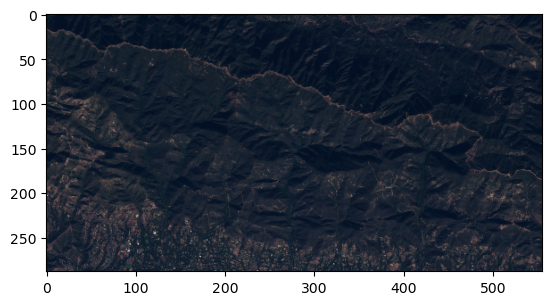

In [76]:
src = rio.open('/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/s2_final_clip.tif')

red = src.read(3)
print(red)
green = src.read(2)
blue = src.read(1)

def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)



# Create RGB natural color composite
rgb1 = np.dstack((red, green, blue))
rgb = adjust_band(rgb1)
#print(rgb)


# shape =gpd.read_file(dirPolyLoc)

# rgb_clip = rgb.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)

plt.imshow(rgb)
    #clip_stats = np.mean(dnbr_clip)
        #print(clip_stats)
# show(image_norm, transform=src.transform)
# rio.plot.show(image_norm, transform=src.transform, adjust=True)

float32
<xarray.DataArray (band: 1, y: 387, x: 355)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2.576e+05 2.576e+05 ... 2.612e+05 2.612e+05
  * y            (y) float64 3.819e+06 3.819e+06 ... 3.815e+06 3.815e+06
    spatial_ref  int64 0


/mnt/nfs/lss/meerdink/home/skzebarth/.conda/envs/geo/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


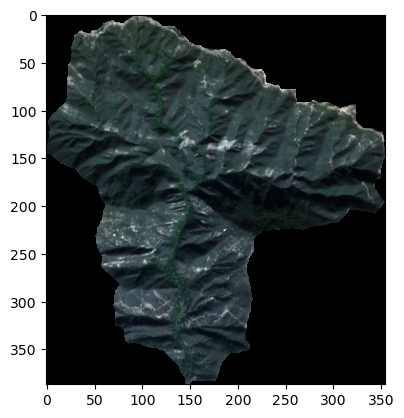

In [72]:
blue = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B02.jp2'
red = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B04.jp2'
green = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/sentinel_2b/rgb/T11SKU_20171128T184719_B03.jp2'
imageRed = rxr.open_rasterio(red, masked=True)
imageBlue = rxr.open_rasterio(blue, masked=True)
imageGreen = rxr.open_rasterio(green, masked=True)
#print('here after load')
print((imageRed.data).dtype)
# print(imageRed.data)
# print(imageBlue.data)
# print(imageGreen.data)
shape = gpd.read_file(dirPolyLoc)

# Clip
redClip = imageRed.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)
#redClip.plot()
blueClip = imageBlue.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)
greenClip = imageGreen.rio.clip(shape.geometry.values, shape.crs, all_touched=False, drop=True, invert=False)

def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))
redn = normalize(redClip)
bluen = normalize(blueClip)
greenn = normalize(greenClip)
print(redn)

#print('here after clip')
# redData = red.data[0,:,:]/2700
# #print(redData)
# blueData = blue.data[0,:,:]/3300
# greenData = green.data[0,:,:]/2700

redData = redn.data[0,:,:]
#print(redData)
blueData = bluen.data[0,:,:]
greenData = greenn.data[0,:,:]

#print('here after divide')

dataPlot = np.zeros((redData.shape[0],redData.shape[1],3))

dataPlot[:,:,0] = redData
dataPlot[:,:,1] = greenData
dataPlot[:,:,2] = blueData
#print('here after assigning')



dataPlotMask = np.ma.masked_where(dataPlot == 0, dataPlot) #np.isnan(dataPlot)

# blueData
# redData
# greenData

plt.figure()
plt.imshow(dataPlotMask)
plt.show()